## Importing necessary libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")

## Reading and preparing data

In [2]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

In [3]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = train.drop(["label"],axis = 1).values
Y = train["label"].values

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


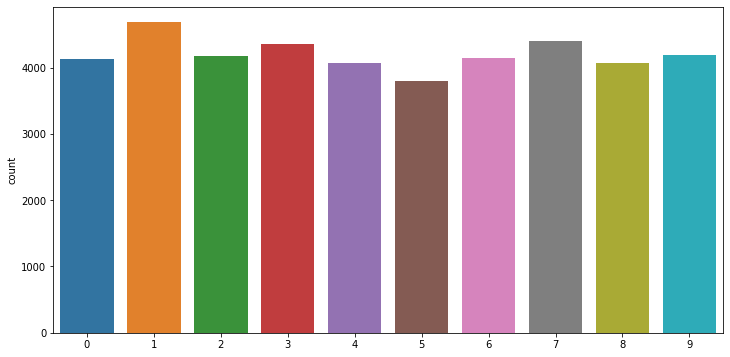

In [6]:
plt.figure(figsize = (12,6))
sb.countplot(Y)

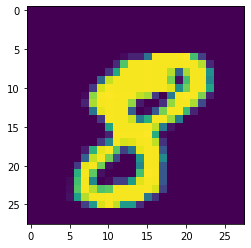

In [7]:
plt.imshow(X[10].reshape([28,28]))

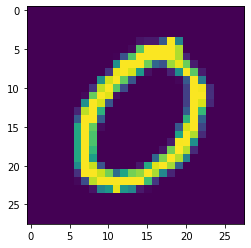

In [8]:
plt.imshow(X[1455].reshape([28,28]))

In [9]:
X = X.reshape([42000,28,28,1])
Y = Y.reshape([42000,1])

In [10]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y = to_categorical(Y, num_classes = 10)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 14)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37800, 28, 28, 1)
(37800, 10)
(4200, 28, 28, 1)
(4200, 10)


In [13]:
x_train = x_train/255
x_test = x_test/255

## Defining the CNN Model architecture

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)        

## Compiling the model (Optimizer=Adam)

In [27]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [29]:
batch_size = 64
epochs = 30

In [30]:
train_datagen = ImageDataGenerator( 
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,
        shear_range = 0.1,
        horizontal_flip=False,  
        vertical_flip=False
        )
train_datagen.fit(x_train)

# Fitting the model

In [34]:
history = model.fit(
            train_datagen.flow(x_train,y_train,batch_size = batch_size),
            validation_data = (x_test,y_test),
            batch_size = batch_size,
            steps_per_epoch = 100,
            epochs = epochs,
            verbose = 1
             )

Epoch 1/30
100/100 [==============================] - 64s 646ms/step - loss: 0.2369 - accuracy: 0.9269 - val_loss: 0.0765 - val_accuracy: 0.9776
Epoch 2/30
100/100 [==============================] - 71s 714ms/step - loss: 0.2104 - accuracy: 0.9400 - val_loss: 0.0877 - val_accuracy: 0.9726
Epoch 3/30
100/100 [==============================] - 71s 705ms/step - loss: 0.1768 - accuracy: 0.9480 - val_loss: 0.0688 - val_accuracy: 0.9779
Epoch 4/30
100/100 [==============================] - 72s 720ms/step - loss: 0.1815 - accuracy: 0.9461 - val_loss: 0.0645 - val_accuracy: 0.9764
Epoch 5/30
100/100 [==============================] - 71s 711ms/step - loss: 0.1709 - accuracy: 0.9488 - val_loss: 0.0579 - val_accuracy: 0.9829
Epoch 6/30
100/100 [==============================] - 74s 737ms/step - loss: 0.1397 - accuracy: 0.9586 - val_loss: 0.0663 - val_accuracy: 0.9802
Epoch 7/30
100/100 [==============================] - 79s 789ms/step - loss: 0.1455 - accuracy: 0.9559 - val_loss: 0.0538 - val_ac

# Train Accuracy : 97.8% 
# Test Accuracy : 98.7%

----------------------------------------


## Model Evaluation

In [35]:
model.evaluate(x_test,y_test)

132/132 [==============================] - 9s 70ms/step - loss: 0.0400 - accuracy: 0.9879


[0.03999985009431839, 0.9878571629524231]

## Accuracy and loss plots

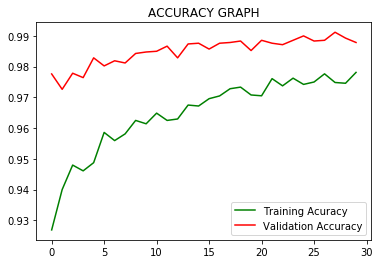

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.title('ACCURACY GRAPH')
plt.legend()

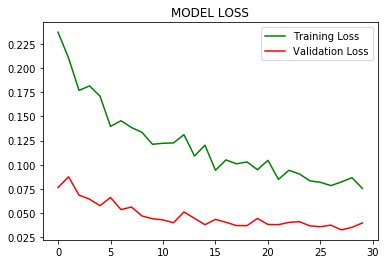

In [47]:
plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.title("MODEL LOSS")
plt.legend()